Описание задания:
Решить задачу классификации при помощи обучения модели логистической регрессии. Целевая переменная — пол спортсмена. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

Этапы работы:

1. Преобразуйте данные:  
a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;  
b. закодируйте категориальные переменные числовыми значениями по необходимости.  
2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.  
3. Постройте ROC-кривую с помощью функции roc_curve из библиотеки sklearn.metrics.  
4. Вычислите значение ROC-AUC метрики с помощью функции roc_auc_score из библиотеки sklearn.metrics.  
5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.  
6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик. Объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.  
7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.  
8. *Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.  
9. Сформулируйте выводы по проделанной работе:  
a) как по полученным графикам сделать вывод о качестве модели?  
  Как вы оцениваете обученную модель исходя из подсчитанных метрик?  
b) *может ли ROC-кривая проходить ниже диагонали?

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/athletes[1].csv')
data.head(20)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
5,173071782,Aaron Royle,AUS,male,1/26/90,1.80,67.0,triathlon,0,0,0
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
7,382571888,Aaron Younger,AUS,male,9/25/91,1.93,100.0,aquatics,0,0,0
8,87689776,Aauri Lorena Bokesa,ESP,female,12/14/88,1.80,62.0,athletics,0,0,0
9,997877719,Ababel Yeshaneh,ETH,female,7/22/91,1.65,54.0,athletics,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [ ]:
data.describe(include=object)

,name,nationality,sex,dob,sport
count,11538,11538,11538,11537,11538
unique,11517,207,2,5595,28
top,Gabriella Szucs,USA,male,3/5/88,athletics
freq,2,567,6333,9,2363


In [ ]:
data[['height','weight']].describe()

,height,weight
count,11208.000000,10879.000000
mean,1.766282,72.068205
std,0.112719,16.177334
min,1.210000,31.000000
25%,1.690000,60.000000
50%,1.760000,70.000000
75%,1.840000,81.000000
max,2.210000,170.000000


In [ ]:
data_nonan = data.fillna({
    'height': data['height'].mean(),
    'weight': data['weight'].mean(),
    'dob': data['dob'].mode()[0]
    })


In [ ]:
data_nonan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11538 non-null  object 
 5   height       11538 non-null  float64
 6   weight       11538 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [ ]:

code = LabelEncoder()
y = code.fit_transform(data_nonan['sex'])
x = pd.get_dummies(data_nonan[['height','weight','sport']])

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)


model = LogisticRegression(max_iter=1000)

model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
model.score(x_train, y_train)

0.8118093174431202

In [ ]:
model.score(x_test, y_test)

0.8093587521663779

In [ ]:

predict = model.predict_proba(x_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, predict)

roc_auc_score(y_test, predict)

np.float64(0.885464030706503)

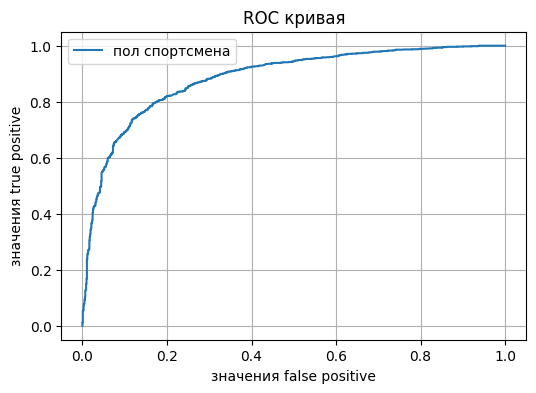

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr)
plt.title('ROC кривая')
plt.xlabel('значения false positive')
plt.ylabel('значения true positive')
plt.legend(['пол спортсмена'], loc='best')
plt.grid()
plt.show()

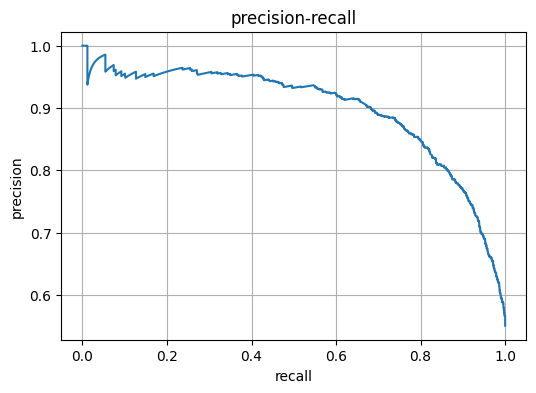

In [ ]:
pr, re, thres = precision_recall_curve(y_test, predict[:, 1])

plt.figure(figsize=(6, 4))
plt.plot(re, pr)
plt.title('precision-recall')
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Предположим, у вас есть предсказанные вероятности и фактические метки
y_pred_prob = model.predict_proba(x_test)[:, 1]
y_true = y_test

# Определяем пороги
thresholds = np.arange(0, 1.01, 0.01)

# Массивы для хранения метрик
tprs = []
fprs = []
precisions = []
recalls = []

for thresh in thresholds:
    # Преобразуем вероятности в бинарные предсказания
    y_pred = (y_pred_prob >= thresh).astype(int)

    # Подсчитываем TP, FP, TN, FN
    tp = np.sum((y_pred == 1) & (y_true == 1))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    tn = np.sum((y_pred == 0) & (y_true == 0))
    fn = np.sum((y_pred == 0) & (y_true == 1))

    # Вычисляем Precision и Recall
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
     # Вычисляем TPR и FPR
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0


    precisions.append(precision)
    recalls.append(recall)
    tprs.append(tpr)
    fprs.append(fpr)

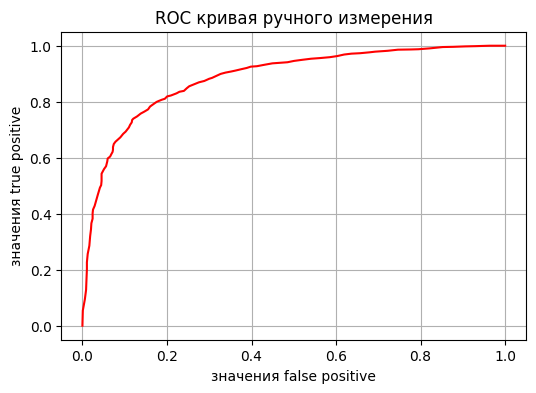

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(fprs, tprs, color='red')
plt.title('ROC кривая ручного измерения')
plt.xlabel('значения false positive')
plt.ylabel('значения true positive')
plt.grid()
plt.show()

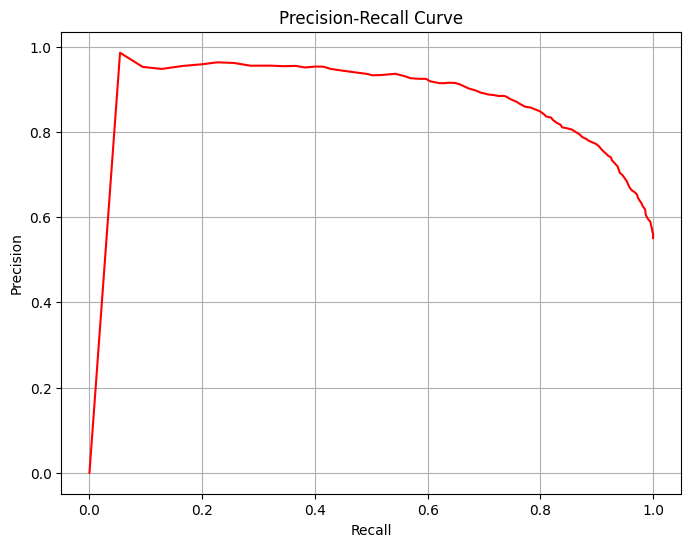

In [ ]:
# Строим график Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, color='red')
plt.title('Precision-Recall ручного измерения')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

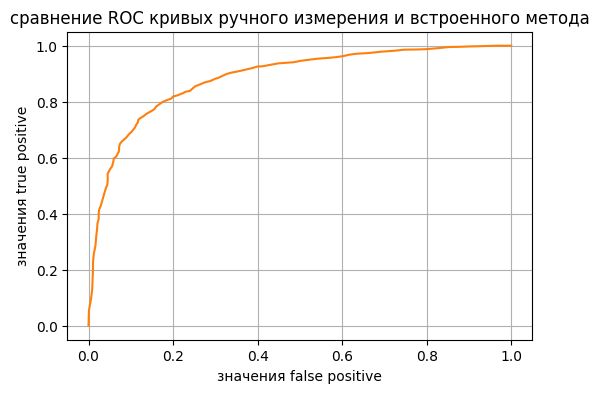

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr)
plt.plot(fprs, tprs)
plt.title('сравнение ROC кривых ручного измерения и встроенного метода')
plt.xlabel('значения false positive')
plt.ylabel('значения true positive')
plt.grid()
plt.show()